### Project Name:
# Healthcare


#### Project by: Syed Sabeel
#### DESCRIPTION

NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.

The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Build a model to accurately predict whether the patients in the dataset have diabetes or not.
 

### Dataset Description

The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

Variables         Description

Pregnancies-Number of times pregnant

Glucose-Plasma glucose concentration in an oral glucose tolerance test

BloodPressure-Diastolic blood pressure (mm Hg)

SkinThickness-Triceps skinfold thickness (mm)

Insulin-Two hour serum insulin

BMI-Body Mass Index

DiabetesPedigreeFunction-Diabetes pedigree function

Age-Age in years

Outcome-Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0

### 1. Business Problem: 

Diabetes is a chronic (long-lasting) health condition that affects how our body turns food into energy. Having diabetes means your body either does not make enough insulin or cannot use the insulin it makes as well as it should. When there is not enough insulin or cells stop responding to insulin, too much blood sugar stays in your bloodstream. Over time, that can cause serious health problems, such as heart disease, vision loss and kidney disease.Hence this is known as silent killer out of all diseases.There is no such medicine which can completely cure, so it is adviced to take precaution to maintain normal glucose level in the body rather facing the consequences later in life.

Early knowing of factors leading to diabetes play a vital role in predicting the disease. Based on certain diagnostic measurements included in the dataset and also by building a model to accurately predict the patients diabetes will help patients to take necessary precaution before suffering any further effect on health.

### 2. Import the necessary libraries:

In [1]:
import pandas as pd # pandas is a python package to manipulate data, data operation, data handling, data wrangling
import numpy as np # numpy is a math library to perform numerical operation using pre-defined function
import matplotlib.pyplot as plt #matplotlib is a library for graphic or data visualization
import seaborn as sns #Seaborn is a library for making statistical graphics in Python
import warnings # to hide the warning message if any
warnings.filterwarnings('ignore')

In [2]:
# Scikit-learn is a machine learning library for the Python programming language. It features various classification, regression and clustering algorithms
from sklearn.impute import KNNImputer # used here to impute/replace zero value in the dataset as per KNN calculation.
from sklearn.model_selection import train_test_split # split the dataset for training and testing the model
from sklearn.preprocessing import StandardScaler # standardize by distributing values in the same range.
from imblearn.over_sampling import SMOTE # for imbalance dataset
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report ,recall_score,roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score

### 3. Load the dataset and identify the dependent and independent variables

Dependent Variable/Label - Outcome of the dataset is the predicted value
Independent Variable/feature - all columns other than Outcome column having integer and float datatypes.


In [3]:
df= pd.read_csv('health care diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 4. EDA(Exploratory Data Analysis)

In [5]:
# Checking missing value/Nan in the dataset
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [8]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [9]:
int_col = [col for col in X.columns if X[col].dtype == 'int']
int_col

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'Age']

In [10]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
# There are many zeros in the dataset which cannot add any value in prediction.
#These zero value needs to be replaced with value and can be done using mean, median etc.
# By treating zero values using knn imputation we can impute zero with calculated value.
# Replace zero values with the values of the nearest neighbours that fills in all zero values using the k Nearest Neighbours.

knn= KNNImputer(missing_values=0, n_neighbors=5) # n_neighbors value is chosen by running many values to achieve better accuracy

In [12]:
knn.fit(X)

KNNImputer(missing_values=0)

In [13]:
df = pd.DataFrame(knn.transform(X),columns=X.columns)

In [14]:
df[int_col]= df[int_col].apply(np.int64)

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,169,33.6,0.627,50
1,1,85,66,29,58,26.6,0.351,31
2,8,183,64,25,164,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,5,137,40,35,168,43.1,2.288,33


In [16]:
df['Outcome'] = y

In [17]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,169,33.6,0.627,50,1
1,1,85,66,29,58,26.6,0.351,31,0
2,8,183,64,25,164,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,5,137,40,35,168,43.1,2.288,33,1


In [18]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

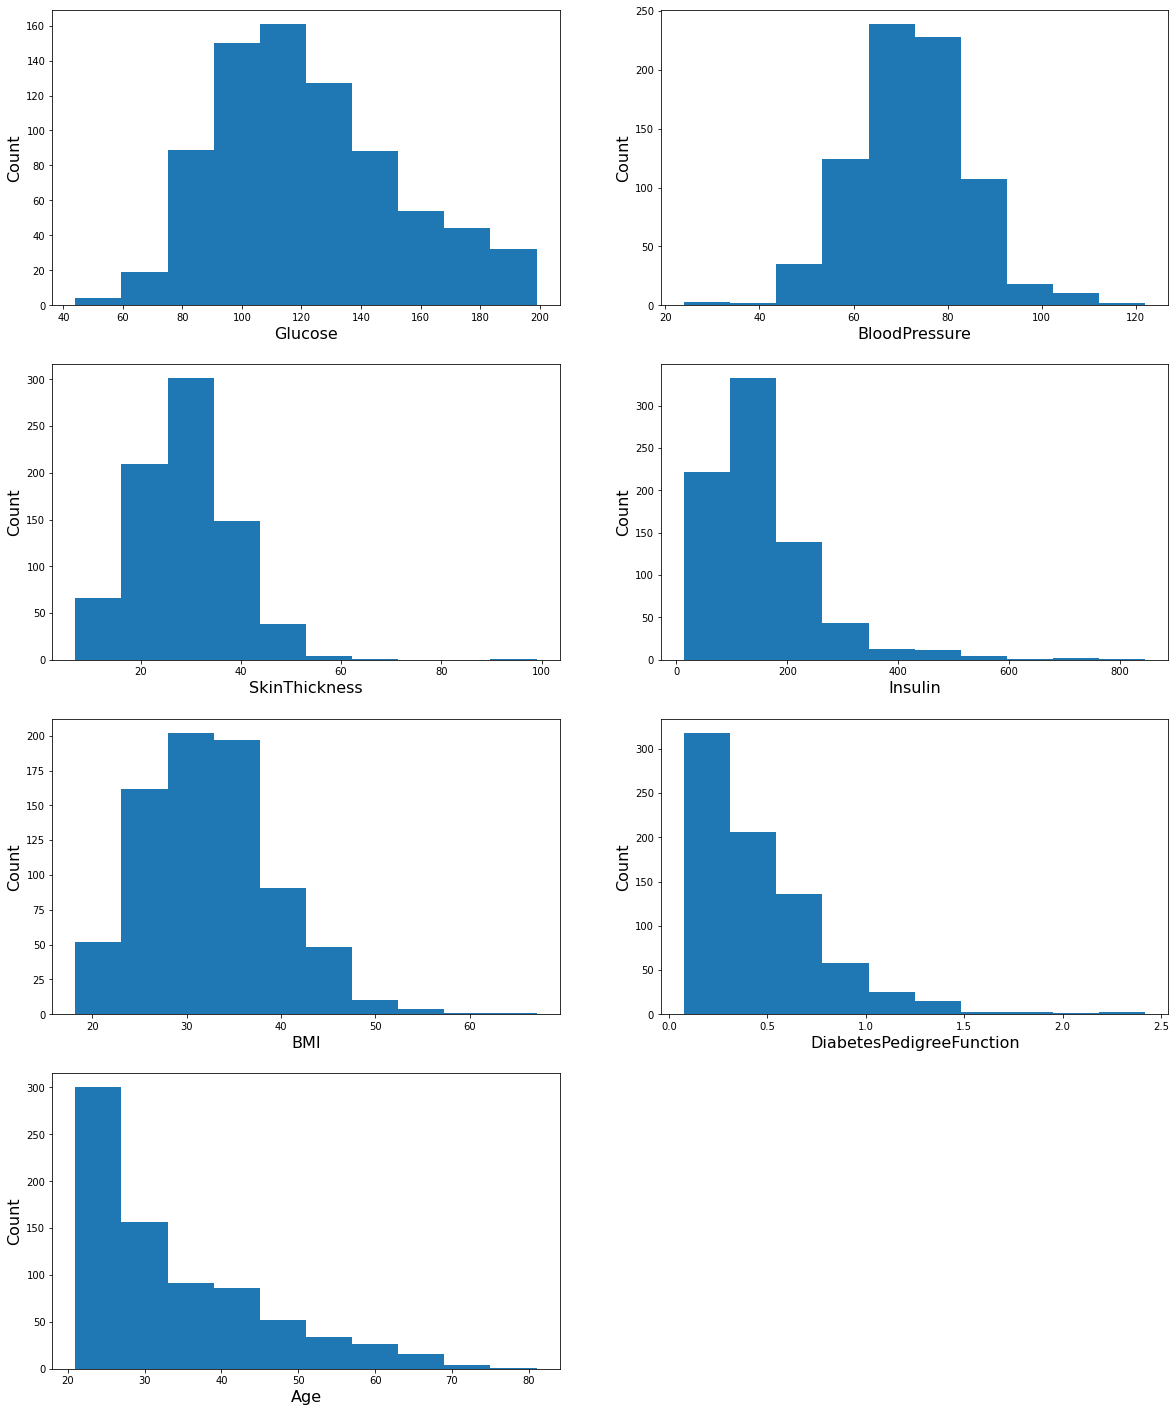

In [19]:
# By plotting histogram we can divide the entire range of values into a series of intervals(bins) then count how many values fall into each interval.
plt.figure(figsize=(20,25))
for i in range(1,8):
    axi=plt.subplot(4,2,i)
    plt.hist(X[X.columns[i]],bins=10)
    xlabel = X.columns[i]
    plt.xlabel(xlabel,fontsize='16')
    plt.ylabel('Count',fontsize='16')

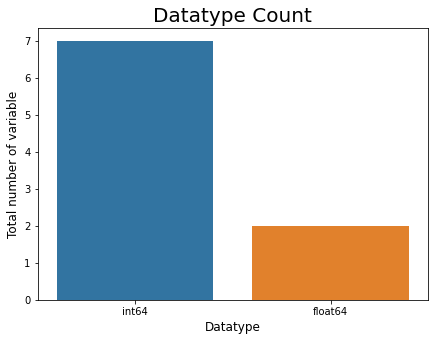

In [20]:
# Count (frequency) plot describing the data types and the count of variables. 
plt.figure(figsize=(7,5))
sns.countplot(x=df.dtypes, data=df)
plt.xlabel('Datatype',fontsize='12')
plt.ylabel('Total number of variable',fontsize='12')
plt.title('Datatype Count', fontsize='20')
plt.show()

In [21]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

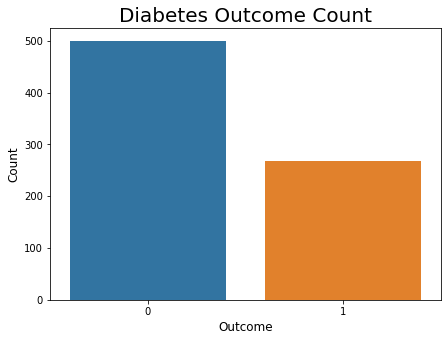

In [22]:
#Count Plot of outcome/Label
plt.figure(figsize=(7,5))
sns.countplot(x=y, data=df)
plt.xlabel('Outcome',fontsize='12')
plt.ylabel('Count',fontsize='12')
plt.title('Diabetes Outcome Count', fontsize='20')
plt.show()

##### By plotting the count of outcomes by their value, we can see there are 500 non diabetes and 268 diabetes. There are more non diabetes patients and this imbalance data can be balanced. Training dataset is balanced by oversampling using SMOTE method.

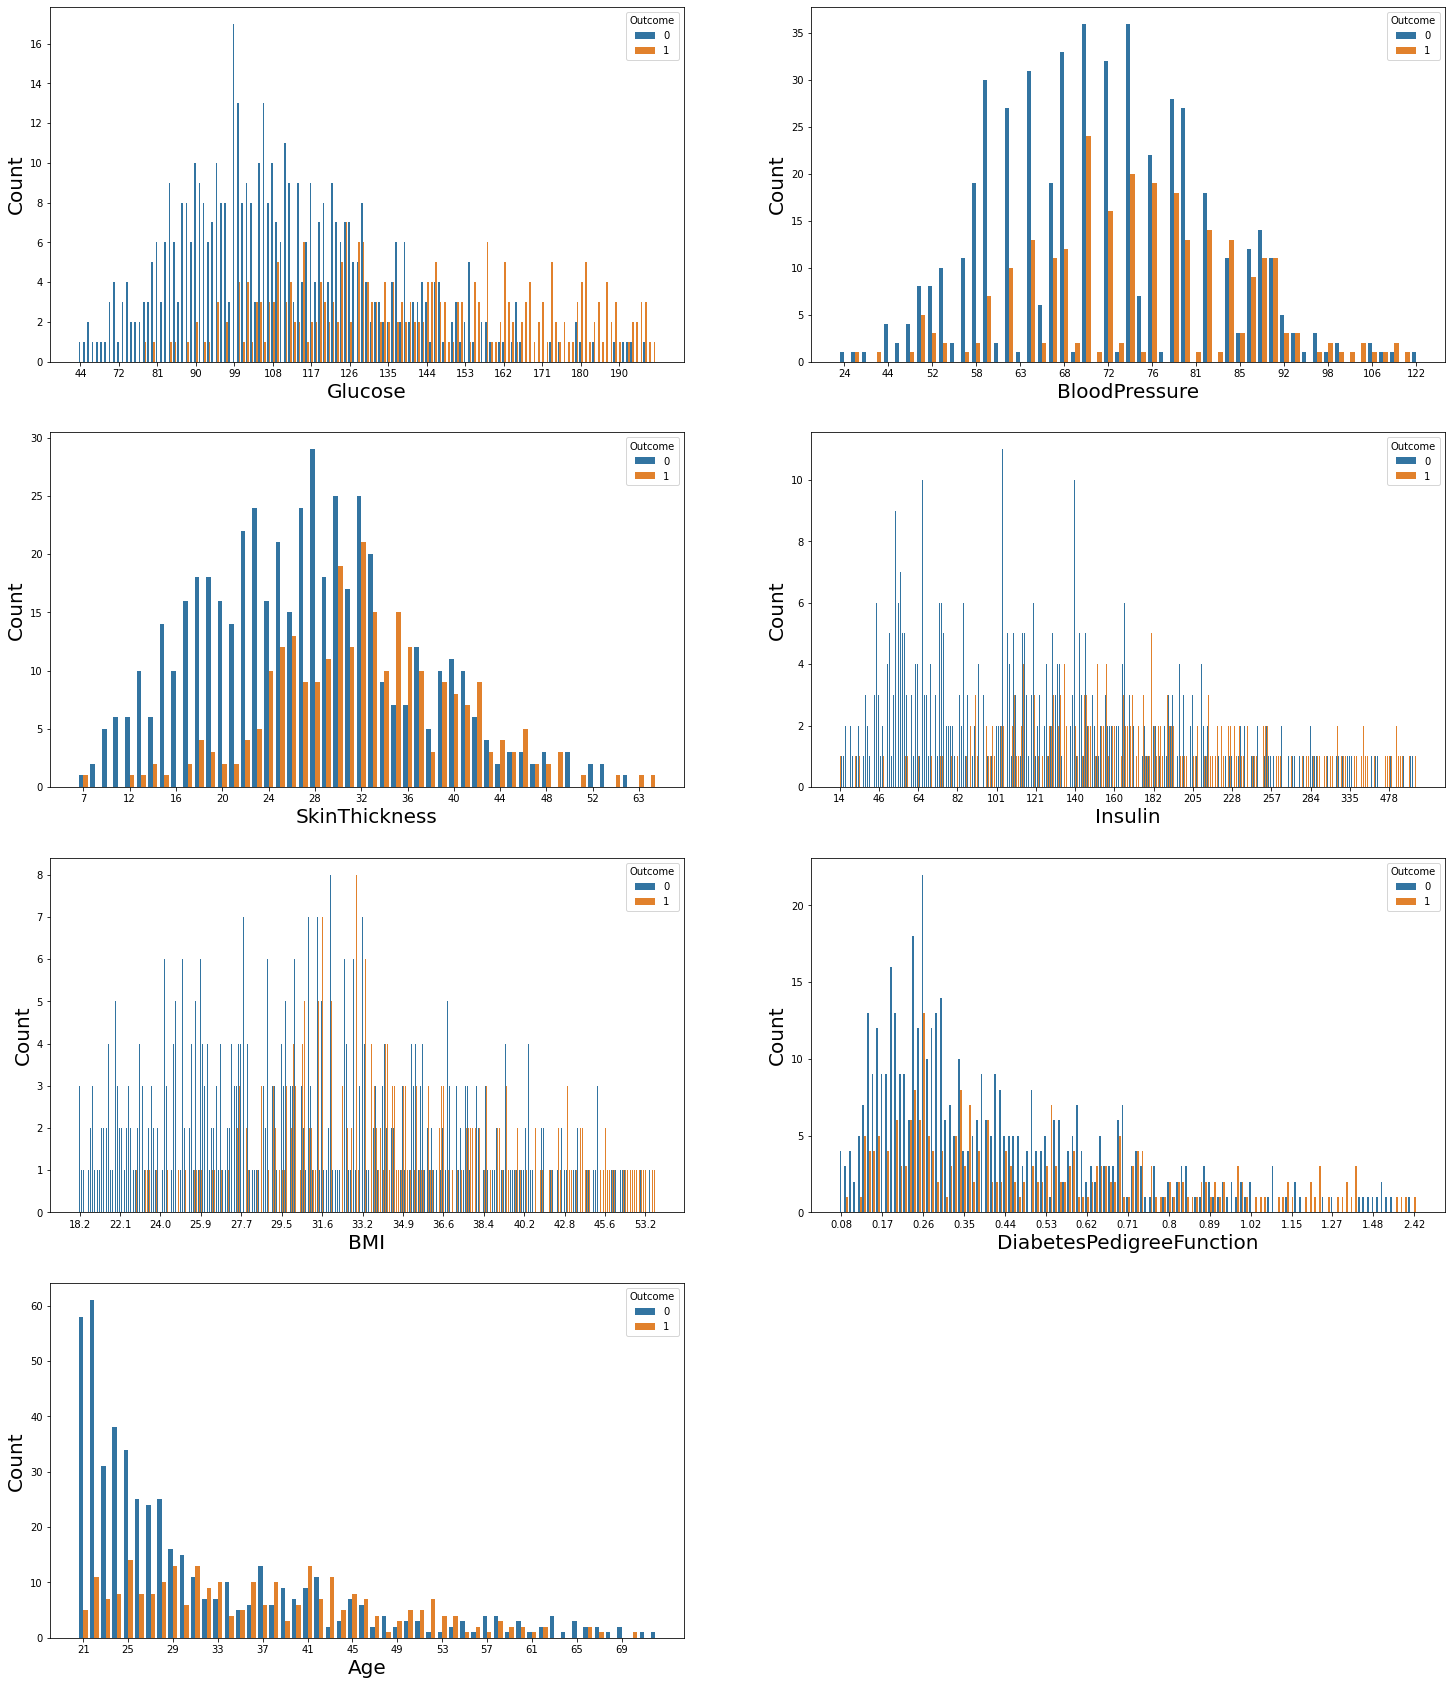

In [23]:
#Countplot of all independent variable with outcomes colored for overall visualization of input data
plt.figure(figsize=(25,30))
for i in range(1,8):
    axi=plt.subplot(4,2,i)
    sns.countplot(x=round(X[X.columns[i]],2),hue=y,data=df,ax=axi)
    plt.locator_params(axis='x', nbins=15)    
    xlabel = X.columns[i]
    plt.xlabel(xlabel, fontsize='20')
    plt.ylabel('Count',fontsize='20')
    plt.legend(title='Outcome',loc='upper right')


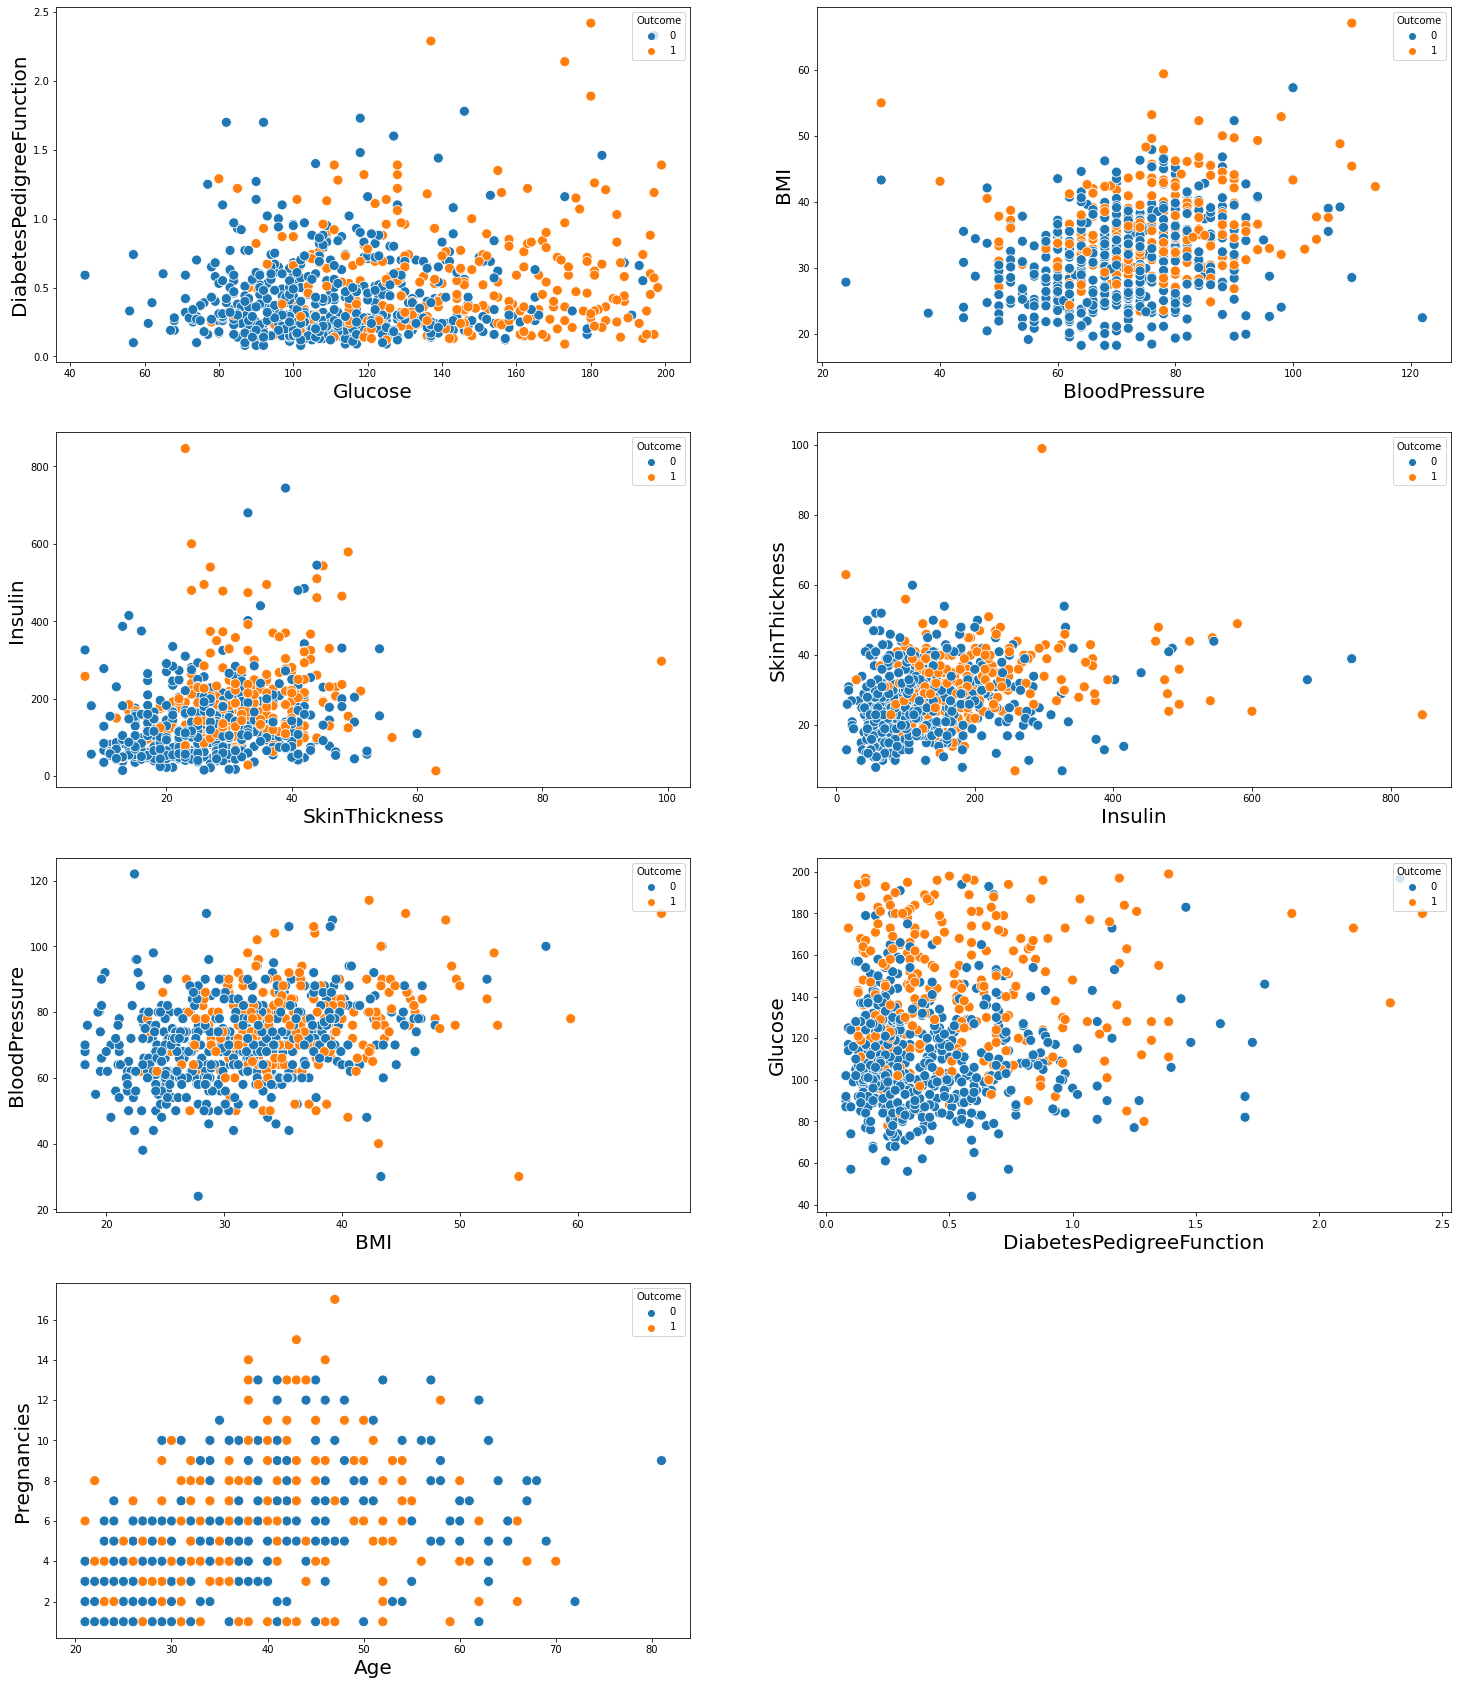

In [24]:
#Scatter plot between variables for analysis by selecting random variable.
colors = {0:'blue', 1:'orange'}
y_ls= y.values.tolist()
color_ls = [colors[i] for i in y_ls ]
plt.figure(figsize=(25,30))
for i in range(1,8):
    axi=plt.subplot(4,2,i)
    sns.scatterplot(x=round(X[X.columns[i]],2),y=round(X[X.columns[7-i]],2),hue=y,data=df,ax=axi,marker='o',s=100)
    xlabel = X.columns[i]
    ylabel = X.columns[7-i]
    plt.xlabel(xlabel, fontsize='20')
    plt.ylabel(ylabel,fontsize='20')
    plt.legend(title='Outcome',loc='upper right')

Above Scatter plot analysis:

plot 1 : High Glucose level with low diabetes pedigree function are more prone to diabetes. More non diabetes patients with low glucose.

plot 2 : More diabetes found with High Blood pressure and high BMI 

plot 7: Age does not matter for diabetes in case of pregnancies and can occur at any age during pregnancy

Below Plot : With respect to BMI and Insulin level age is not the factor for diabetes. Maintaining good BMI and Insulin level can keep diabetes away.

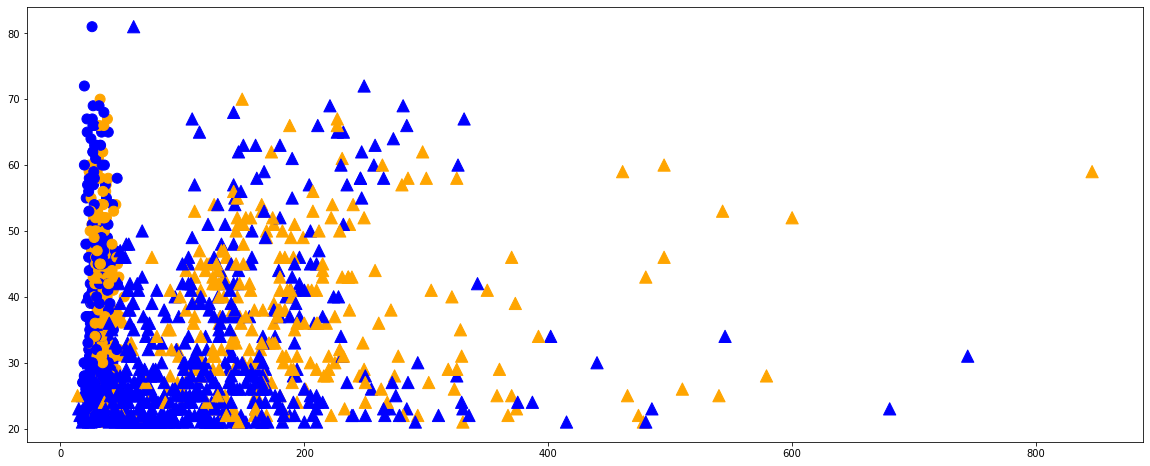

In [25]:
plt.figure(figsize=(20,8))
plt.scatter(x=df['BMI'],y= df['Age'], c=color_ls,s=100)
plt.scatter(x=df['Insulin'],y= df['Age'], c=color_ls, marker='^',s=150)
plt.show()

In [26]:
# Analysis using Corelation 
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.160064,0.274583,0.147417,0.087091,0.105805,0.004083,0.558149,0.250365
Glucose,0.160064,1.000000,0.231918,0.246727,0.627695,0.236708,0.139273,0.270197,0.495830
BloodPressure,0.274583,0.231918,1.000000,0.225316,0.134606,0.292661,0.003695,0.335528,0.175720
SkinThickness,0.147417,0.246727,0.225316,1.000000,0.244180,0.641102,0.116022,0.145173,0.277750
Insulin,0.087091,0.627695,0.134606,0.244180,1.000000,0.248560,0.137714,0.238188,0.317367
BMI,0.105805,0.236708,0.292661,0.641102,0.248560,1.000000,0.153602,0.027380,0.313878
DiabetesPedigreeFunction,0.004083,0.139273,0.003695,0.116022,0.137714,0.153602,1.000000,0.033561,0.173844
Age,0.558149,0.270197,0.335528,0.145173,0.238188,0.027380,0.033561,1.000000,0.238356
Outcome,0.250365,0.495830,0.175720,0.277750,0.317367,0.313878,0.173844,0.238356,1.000000


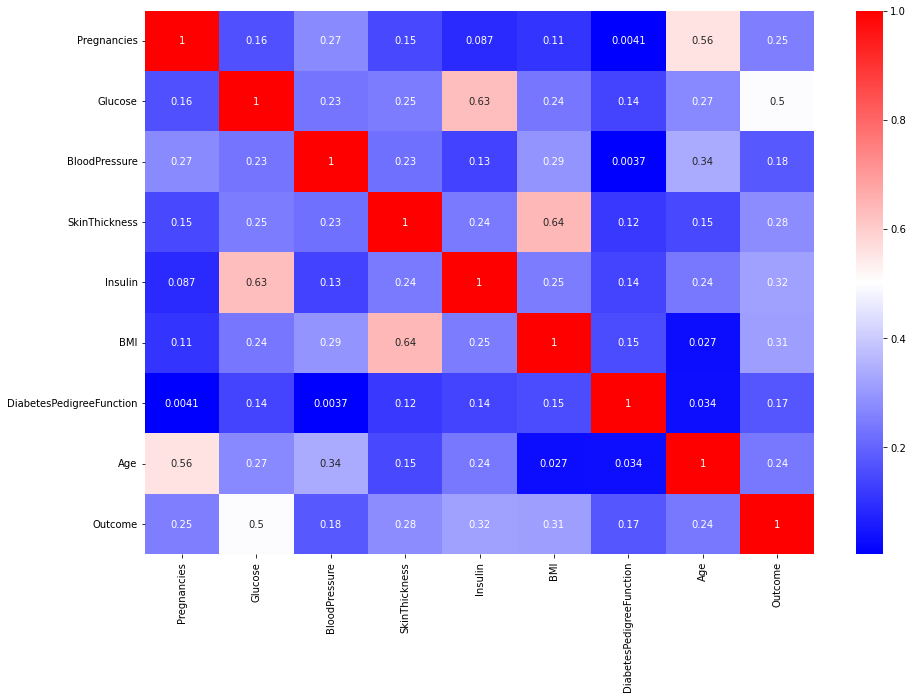

In [27]:
# Correlation of variable using Heat map from Seaborn library
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='bwr',annot= True)
plt.show()

Correlation value lies betweeen -1 & +1, where as 1 means strong positive correlation, -1 means negative correlation and 0 means there is no correlation.
Glucose & Insulin, BMI & Skin thickness are on positive relation, with increase in either one other increase.
There are no negative correlation which will have indirect impact on outcome.

In [28]:
#Splitting entire dataset to train and test,by training model on training set we can predict the label on testing data.
X_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.3, random_state=42)

In [29]:
# Standardization to be on same scale range
X_sc= StandardScaler()
X_train_sc = X_sc.fit_transform(X_train)
x_test_sc = X_sc.transform(x_test)

In [30]:
print(X_train_sc.shape)
print(x_test_sc.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train.value_counts())

(537, 8)
(231, 8)
(537,)
(231,)
0    349
1    188
Name: Outcome, dtype: int64


In [31]:
# Balancing data using SMOTE method
smote= SMOTE(sampling_strategy='minority',random_state=42)
X_sm,y_sm = smote.fit_resample(X_train_sc,y_train)


In [32]:
print(X_sm.shape)
print(y_sm.shape)

(698, 8)
(698,)


In [33]:
y_sm.value_counts()

1    349
0    349
Name: Outcome, dtype: int64

### Model Selection & Evaluation

Since the outcome of this dataset is classification i.e diabetes or non- diabetes, Classification model of machine learning shall be considered.
1. Decision Tree Classifier
2. Random Forest Classifier
3. AdaBoost Classifier
4. Gradient Boosting Classifier
5. KNN Classifier

Model evaluation for classification type is done by using confusion matrix, accuracy score.

In [34]:
# 1. Decision Tree Classifier:

DC = DecisionTreeClassifier(random_state=42)
DC.fit(X_sm,y_sm)
print(confusion_matrix(y_true= y_test, y_pred = DC.predict(x_test_sc)))
print('Accuracy Score is', accuracy_score(y_true= y_test, y_pred = DC.predict(x_test_sc))*100)
print(classification_report(y_true= y_test, y_pred = DC.predict(x_test_sc)))

[[114  37]
 [ 31  49]]
Accuracy Score is 70.56277056277057
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       151
           1       0.57      0.61      0.59        80

    accuracy                           0.71       231
   macro avg       0.68      0.68      0.68       231
weighted avg       0.71      0.71      0.71       231



In [35]:
DC_train = DecisionTreeClassifier(random_state=42)
DC_train.fit(X_train_sc,y_train)
print(confusion_matrix(y_true= y_test, y_pred = DC_train.predict(x_test_sc)))
print('Accuracy Score is', accuracy_score(y_true= y_test, y_pred = DC_train.predict(x_test_sc))*100)
print(classification_report(y_true= y_test, y_pred = DC_train.predict(x_test_sc)))

[[111  40]
 [ 36  44]]
Accuracy Score is 67.09956709956711
              precision    recall  f1-score   support

           0       0.76      0.74      0.74       151
           1       0.52      0.55      0.54        80

    accuracy                           0.67       231
   macro avg       0.64      0.64      0.64       231
weighted avg       0.68      0.67      0.67       231



In [36]:
# 2. Random Forest Classifier
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
rf.fit(X_sm,y_sm)
print(confusion_matrix(y_true= y_test, y_pred = rf.predict(x_test_sc)))
print('Accuracy Score is',accuracy_score(y_true= y_test, y_pred = rf.predict(x_test_sc))*100)
print(classification_report(y_true= y_test, y_pred = rf.predict(x_test_sc)))
print('Sensitivity/True Positive rate', recall_score(y_true= y_test, y_pred = rf.predict(x_test_sc),pos_label=0))
print('Specificity/True Negative rate', recall_score(y_true= y_test, y_pred = rf.predict(x_test_sc),pos_label=1))
print('roc_auc_score',roc_auc_score(y_true= y_test,y_score=rf.predict(x_test_sc)))
roc_curve(y_true= y_test,y_score=rf.predict(x_test_sc))

[[117  34]
 [ 20  60]]
Accuracy Score is 76.62337662337663
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       151
           1       0.64      0.75      0.69        80

    accuracy                           0.77       231
   macro avg       0.75      0.76      0.75       231
weighted avg       0.78      0.77      0.77       231

Sensitivity/True Positive rate 0.7748344370860927
Specificity/True Negative rate 0.75
roc_auc_score 0.7624172185430463


(array([0.        , 0.22516556, 1.        ]),
 array([0.  , 0.75, 1.  ]),
 array([2, 1, 0]))

In [37]:
rf_train = RandomForestClassifier(n_jobs=-1, random_state=42)
rf_train.fit(X_train_sc,y_train)
print(confusion_matrix(y_true= y_test, y_pred = rf_train.predict(x_test_sc)))
print('Accuracy Score is',accuracy_score(y_true= y_test, y_pred = rf_train.predict(x_test_sc))*100)
print(classification_report(y_true= y_test, y_pred = rf_train.predict(x_test_sc)))

[[119  32]
 [ 29  51]]
Accuracy Score is 73.59307359307358
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.61      0.64      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [38]:
# 3. Ada Boost Classifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_sm,y_sm)
print(confusion_matrix(y_true= y_test, y_pred = ab.predict(x_test_sc)))
print('Accuracy Score is',accuracy_score(y_true= y_test, y_pred = ab.predict(x_test_sc))*100)
print(classification_report(y_true= y_test, y_pred = ab.predict(x_test_sc)))

[[114  37]
 [ 22  58]]
Accuracy Score is 74.45887445887446
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       151
           1       0.61      0.72      0.66        80

    accuracy                           0.74       231
   macro avg       0.72      0.74      0.73       231
weighted avg       0.76      0.74      0.75       231



In [39]:
ab_train = AdaBoostClassifier(random_state=42)
ab_train.fit(X_train_sc,y_train)
print(confusion_matrix(y_true= y_test, y_pred = ab_train.predict(x_test_sc)))
print('Accuracy Score is',accuracy_score(y_true= y_test, y_pred = ab_train.predict(x_test_sc))*100)
print(classification_report(y_true= y_test, y_pred = ab_train.predict(x_test_sc)))

[[119  32]
 [ 26  54]]
Accuracy Score is 74.89177489177489
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.63      0.68      0.65        80

    accuracy                           0.75       231
   macro avg       0.72      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



In [40]:
# 4.Gradient Boosting Classifier
gb= GradientBoostingClassifier(random_state=42)
gb.fit(X_sm,y_sm)
print(confusion_matrix(y_true= y_test, y_pred = gb.predict(x_test_sc)))
print('Accuracy Score is',accuracy_score(y_true= y_test, y_pred = gb.predict(x_test_sc))*100)
print(classification_report(y_true= y_test, y_pred = gb.predict(x_test_sc)))

[[110  41]
 [ 24  56]]
Accuracy Score is 71.86147186147186
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       151
           1       0.58      0.70      0.63        80

    accuracy                           0.72       231
   macro avg       0.70      0.71      0.70       231
weighted avg       0.74      0.72      0.72       231



In [41]:
gb_train= GradientBoostingClassifier(random_state=42)
gb_train.fit(X_train_sc,y_train)
print(confusion_matrix(y_true= y_test, y_pred = gb_train.predict(x_test_sc)))
print('Accuracy Score is',accuracy_score(y_true= y_test, y_pred = gb_train.predict(x_test_sc))*100)
print(classification_report(y_true= y_test, y_pred = gb_train.predict(x_test_sc)))

[[120  31]
 [ 28  52]]
Accuracy Score is 74.45887445887446
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.63      0.65      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.74      0.75       231



In [42]:
# 5. KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7,weights='uniform',algorithm='auto',leaf_size=30,p=2,
                          metric='minkowski',metric_params=None,n_jobs=None)
knn.fit(X_sm,y_sm)
print(confusion_matrix(y_true= y_test, y_pred = knn.predict(x_test_sc)))
print('Accuracy Score is',accuracy_score(y_true= y_test, y_pred = knn.predict(x_test_sc))*100)
print(classification_report(y_true= y_test, y_pred = knn.predict(x_test_sc)))
print('Sensitivity/True Positive rate', recall_score(y_true= y_test, y_pred = knn.predict(x_test_sc),pos_label=0))
print('Specificity/True Negative rate', recall_score(y_true= y_test, y_pred = knn.predict(x_test_sc),pos_label=1))
print('roc_auc_score',roc_auc_score(y_true= y_test,y_score=knn.predict(x_test_sc)))
roc_curve(y_true= y_test,y_score=knn.predict(x_test_sc))

[[95 56]
 [13 67]]
Accuracy Score is 70.12987012987013
              precision    recall  f1-score   support

           0       0.88      0.63      0.73       151
           1       0.54      0.84      0.66        80

    accuracy                           0.70       231
   macro avg       0.71      0.73      0.70       231
weighted avg       0.76      0.70      0.71       231

Sensitivity/True Positive rate 0.6291390728476821
Specificity/True Negative rate 0.8375
roc_auc_score 0.7333195364238411


(array([0.        , 0.37086093, 1.        ]),
 array([0.    , 0.8375, 1.    ]),
 array([2, 1, 0]))

In [43]:
knn_train = KNeighborsClassifier(n_neighbors=13,weights='uniform',algorithm='auto',leaf_size=30,p=2,
                          metric='minkowski',metric_params=None,n_jobs=None)
knn_train.fit(X_train_sc,y_train)
print(confusion_matrix(y_true= y_test, y_pred = knn_train.predict(x_test_sc)))
print('Accuracy Score is',accuracy_score(y_true= y_test, y_pred = knn_train.predict(x_test_sc))*100)
print(classification_report(y_true= y_test, y_pred = knn_train.predict(x_test_sc)))
print('Sensitivity/True Positive rate', recall_score(y_true= y_test, y_pred = knn_train.predict(x_test_sc),pos_label=0))
print('Specificity/True Negative rate', recall_score(y_true= y_test, y_pred = knn_train.predict(x_test_sc),pos_label=1))
print('roc_auc_score',roc_auc_score(y_true= y_test,y_score=knn_train.predict(x_test_sc)))
roc_curve(y_true= y_test,y_score=knn_train.predict(x_test_sc))

[[119  32]
 [ 31  49]]
Accuracy Score is 72.72727272727273
              precision    recall  f1-score   support

           0       0.79      0.79      0.79       151
           1       0.60      0.61      0.61        80

    accuracy                           0.73       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231

Sensitivity/True Positive rate 0.7880794701986755
Specificity/True Negative rate 0.6125
roc_auc_score 0.7002897350993378


(array([0.        , 0.21192053, 1.        ]),
 array([0.    , 0.6125, 1.    ]),
 array([2, 1, 0]))

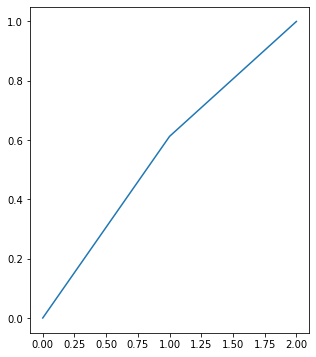

In [44]:
plt.figure(figsize=(5,6))
plt.plot(roc_curve(y_true= y_test,y_score=knn_train.predict(x_test_sc))[1])
plt.show()

In [45]:
kfold_model = KFold(n_splits=10)
kf_model = KNeighborsClassifier(n_neighbors=7)
results = cross_val_score(kf_model, X_sm, y_sm, cv=kfold_model)

In [46]:
results.mean()*100

79.13250517598344

##### After running many model classifier, Random Forest classifier results in better accuracy with 76%. After imputing with Knn and also balancing the data ,  recall value 0.77,0.75 is found for True positiver rate/ True negative rate. Both sensitivity and specificty for the prediction of diabetes / non diabetes has good value.  This classifier is more prefered than other classifier.

#### Modeling using Deep learning tensorflow using keras

In [47]:
import tensorflow as tf

In [48]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(12, input_dim=8, activation ='relu'))
model.add(tf.keras.layers.Dense(8, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))


In [49]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

In [50]:
model.fit(X_train_sc,y_train,epochs=60, batch_size=10)

Epoch 1/60
54/54 [==============================] - 5s 2ms/step - loss: 0.7244 - accuracy: 0.4246
Epoch 2/60
54/54 [==============================] - 0s 2ms/step - loss: 0.6422 - accuracy: 0.6536
Epoch 3/60
54/54 [==============================] - 0s 1ms/step - loss: 0.5876 - accuracy: 0.7169
Epoch 4/60
54/54 [==============================] - 0s 2ms/step - loss: 0.5451 - accuracy: 0.7393
Epoch 5/60
54/54 [==============================] - 0s 1ms/step - loss: 0.5146 - accuracy: 0.7542
Epoch 6/60
54/54 [==============================] - 0s 2ms/step - loss: 0.4923 - accuracy: 0.7672
Epoch 7/60
54/54 [==============================] - 0s 1ms/step - loss: 0.4775 - accuracy: 0.7784
Epoch 8/60
54/54 [==============================] - 0s 2ms/step - loss: 0.4671 - accuracy: 0.7728
Epoch 9/60
54/54 [==============================] - 0s 2ms/step - loss: 0.4589 - accuracy: 0.7728
Epoch 10/60
54/54 [==============================] - 0s 2ms/step - loss: 0.4517 - accuracy: 0.7803
Epoch 11/60
54/54 [

In [51]:
loss,accuracy = model.evaluate(X_train_sc,y_train)
print('Accuracy : %.2f' %(accuracy*100))

17/17 [==============================] - 0s 1ms/step - loss: 0.3818 - accuracy: 0.8138
Accuracy : 81.38


In [ ]:
#df.to_csv('Health care Tableau.csv')